In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/CleanZeroValDrop1.xlsx'
df = pd.read_excel(file_path)

# Check data types and missing values
print(df.info())
print(df.isnull().sum())

# Summary statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185996 entries, 0 to 185995
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Dealer                 185996 non-null  object        
 1   Employee               185996 non-null  object        
 2   job_type               185996 non-null  object        
 3   plan_duration          185996 non-null  int64         
 4   actual_duration        185996 non-null  float64       
 5   actual_work            185996 non-null  float64       
 6   created_on_date_date   185996 non-null  datetime64[ns]
 7   created_on_date_time   185996 non-null  object        
 8   assigned_on_date_date  185996 non-null  datetime64[ns]
 9   assigned_on_date_time  185996 non-null  object        
 10  plan_start_date_date   185996 non-null  datetime64[ns]
 11  plan_start_date_time   185996 non-null  object        
 12  plan_finish_date_date  185996 non-null  date

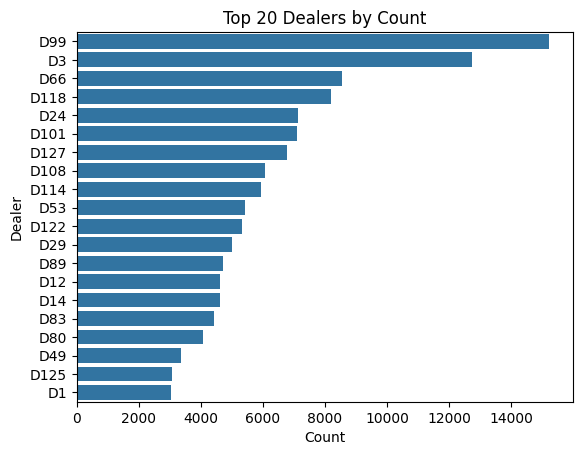

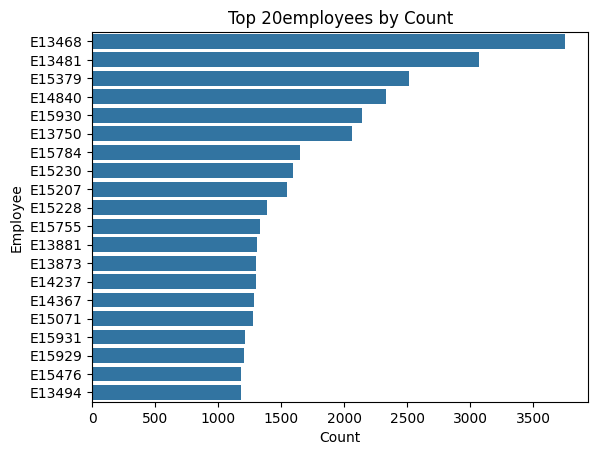

In [ ]:
# Distribution of  Dealer, Employee
top_n = 20
top_dealers = df['Dealer'].value_counts().nlargest(top_n)

sns.barplot(y=top_dealers.index, x=top_dealers.values)
plt.title(f'Top {top_n} Dealers by Count')
plt.xlabel('Count')
plt.ylabel('Dealer')
plt.show()


top_n = 20
top_employees = df['Employee'].value_counts().nlargest(top_n)

sns.barplot(y=top_employees.index, x=top_employees.values)
plt.title(f'Top {top_n}employees by Count')
plt.xlabel('Count')
plt.ylabel('Employee')
plt.show()


plan_duration        int64
actual_duration    float64
dtype: object
plan_duration      0
actual_duration    0
dtype: int64


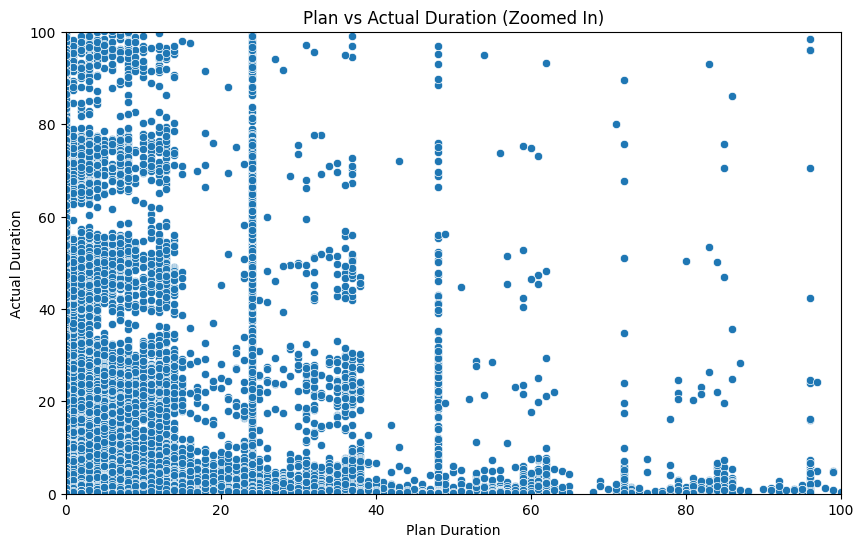

In [ ]:


# Check the data types of the relevant columns
print(df[['plan_duration', 'actual_duration']].dtypes)

# Convert to numeric, forcing any errors to NaN
df['plan_duration'] = pd.to_numeric(df['plan_duration'], errors='coerce')
df['actual_duration'] = pd.to_numeric(df['actual_duration'], errors='coerce')

# Check for any NaN values introduced by conversion
print(df[['plan_duration', 'actual_duration']].isnull().sum())

# Option 1: Drop rows with NaN values
df = df.dropna(subset=['plan_duration', 'actual_duration'])

# Set axis limits to focus on smaller values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='plan_duration', y='actual_duration', data=df)

# Set limits on the axes
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.title('Plan vs Actual Duration (Zoomed In)')
plt.xlabel('Plan Duration')
plt.ylabel('Actual Duration')
plt.show()



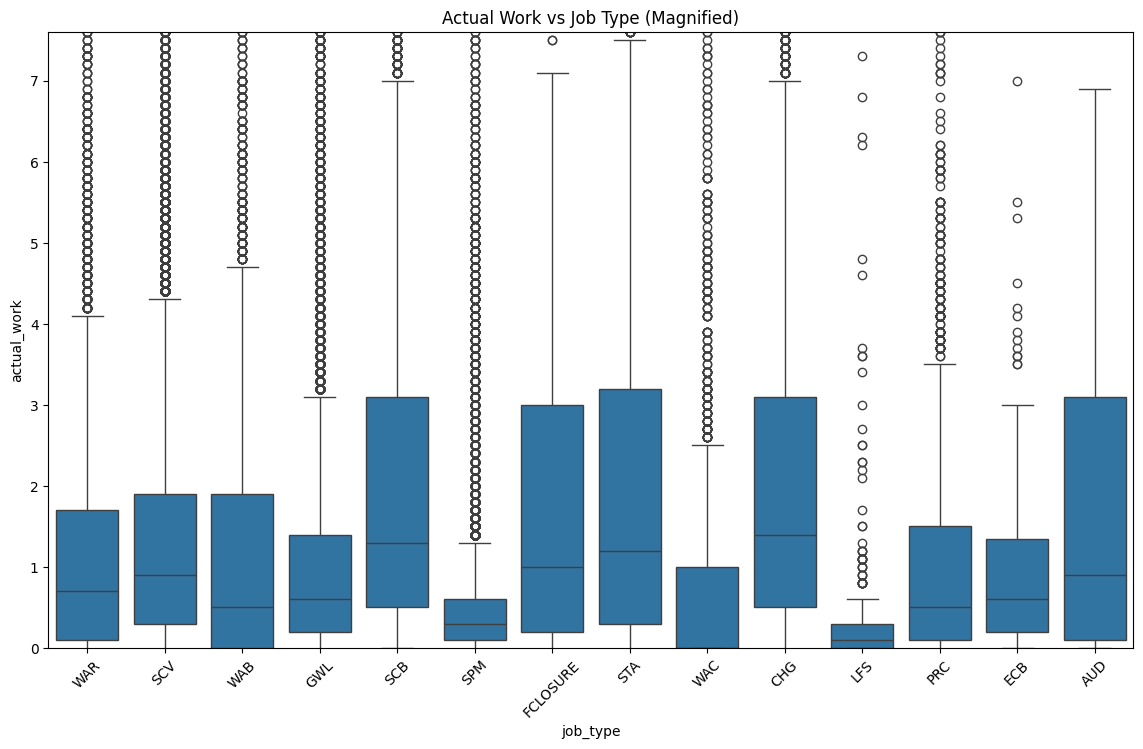

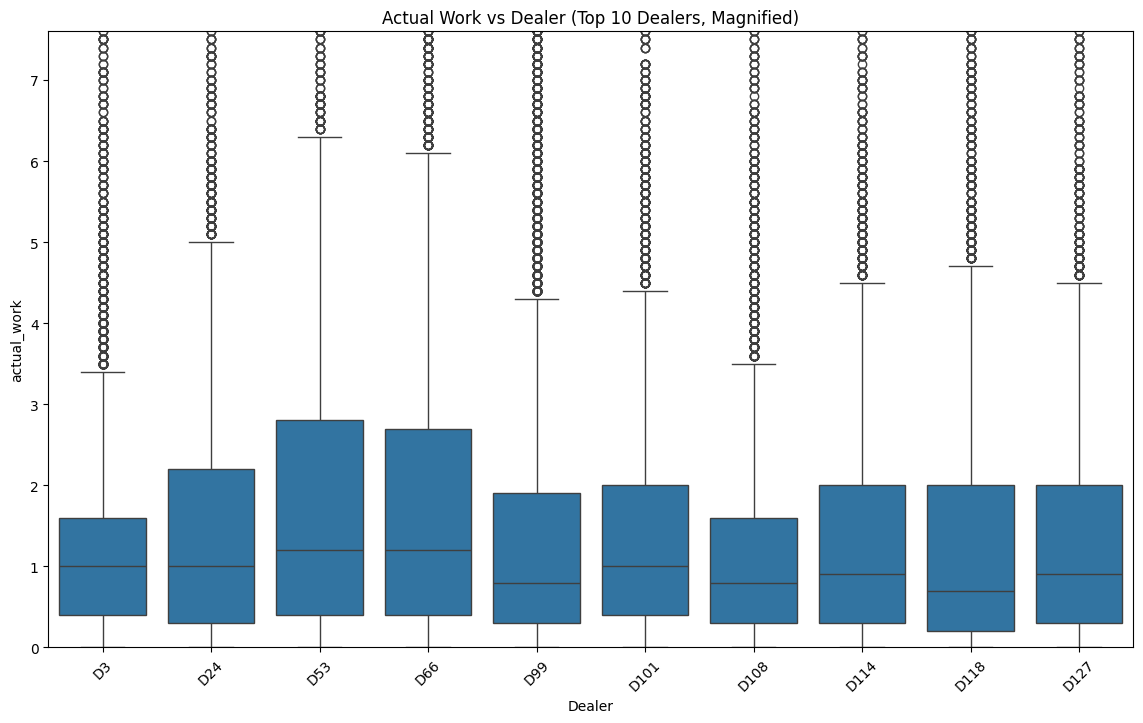

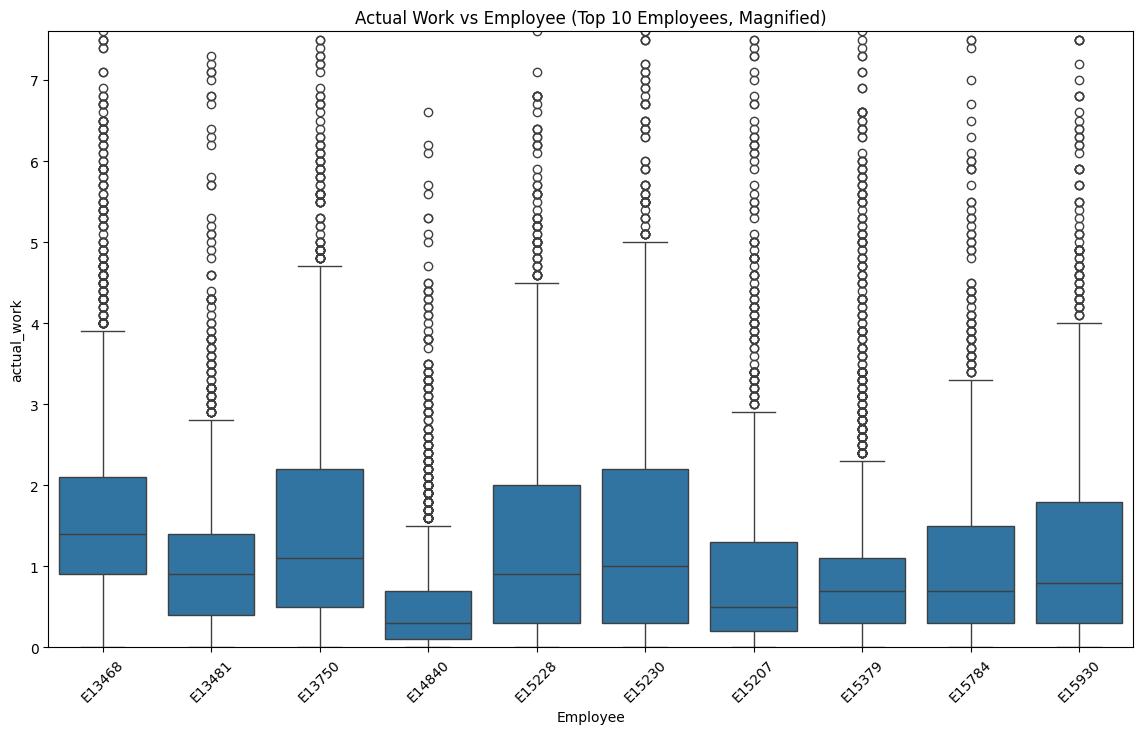

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a larger figure size and magnify the y-axis to focus on a specific range

# Plotting actual_work against job_type
plt.figure(figsize=(14, 8))
sns.boxplot(x='job_type', y='actual_work', data=df)
plt.ylim(0, df['actual_work'].quantile(0.95))  # Adjust the range to focus on the relevant area
plt.title('Actual Work vs Job Type (Magnified)')
plt.xticks(rotation=45)
plt.show()

# Plotting actual_work against Dealer (top 10 dealers for clarity)
top_dealers = df['Dealer'].value_counts().nlargest(10).index
df_top_dealers = df[df['Dealer'].isin(top_dealers)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='Dealer', y='actual_work', data=df_top_dealers)
plt.ylim(0, df['actual_work'].quantile(0.95))  # Adjust the range to focus on the relevant area
plt.title('Actual Work vs Dealer (Top 10 Dealers, Magnified)')
plt.xticks(rotation=45)
plt.show()

# Plotting actual_work against Employee (top 10 employees for clarity)
top_employees = df['Employee'].value_counts().nlargest(10).index
df_top_employees = df[df['Employee'].isin(top_employees)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='Employee', y='actual_work', data=df_top_employees)
plt.ylim(0, df['actual_work'].quantile(0.95))  # Adjust the range to focus on the relevant area
plt.title('Actual Work vs Employee (Top 10 Employees, Magnified)')
plt.xticks(rotation=45)
plt.show()



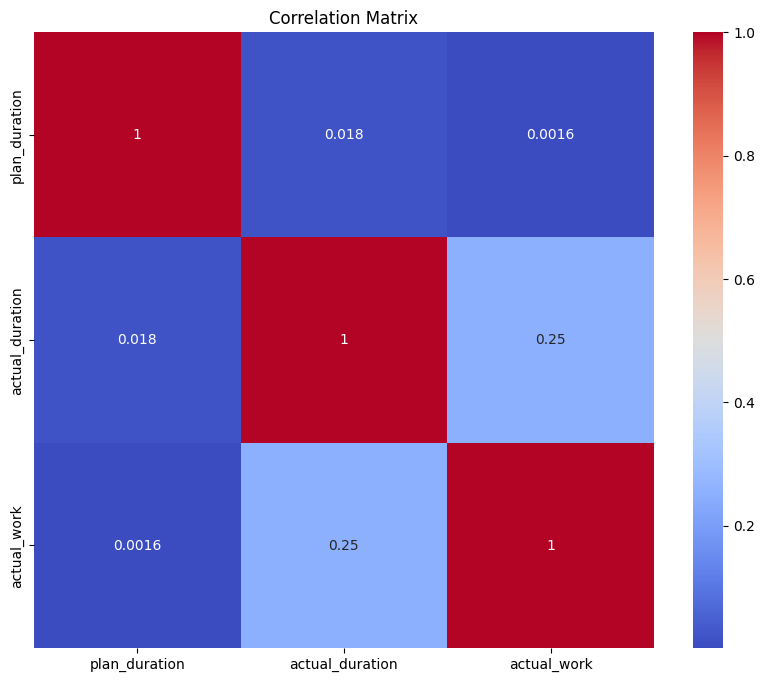

In [ ]:
import seaborn as sns

# Selecting only numeric columns for the correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Creating the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


0   2018-01-13 13:27:00
1   2018-01-15 11:03:00
2   2018-01-15 11:14:00
3   2018-01-16 10:20:00
4   2018-01-17 10:01:00
Name: created_on_datetime, dtype: datetime64[ns]


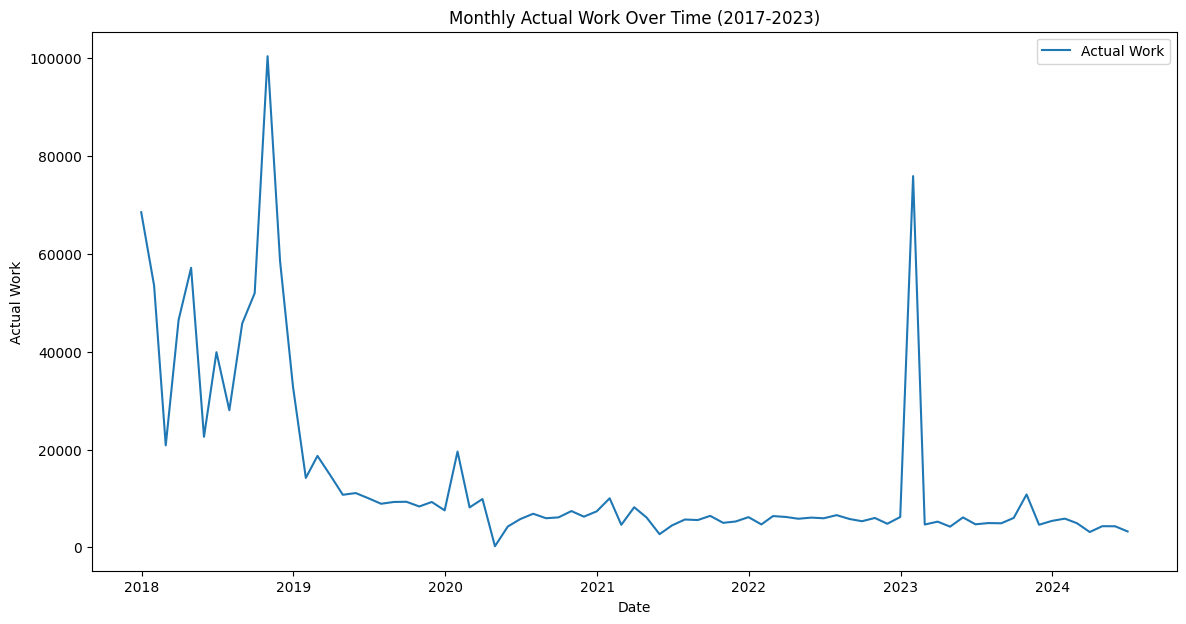

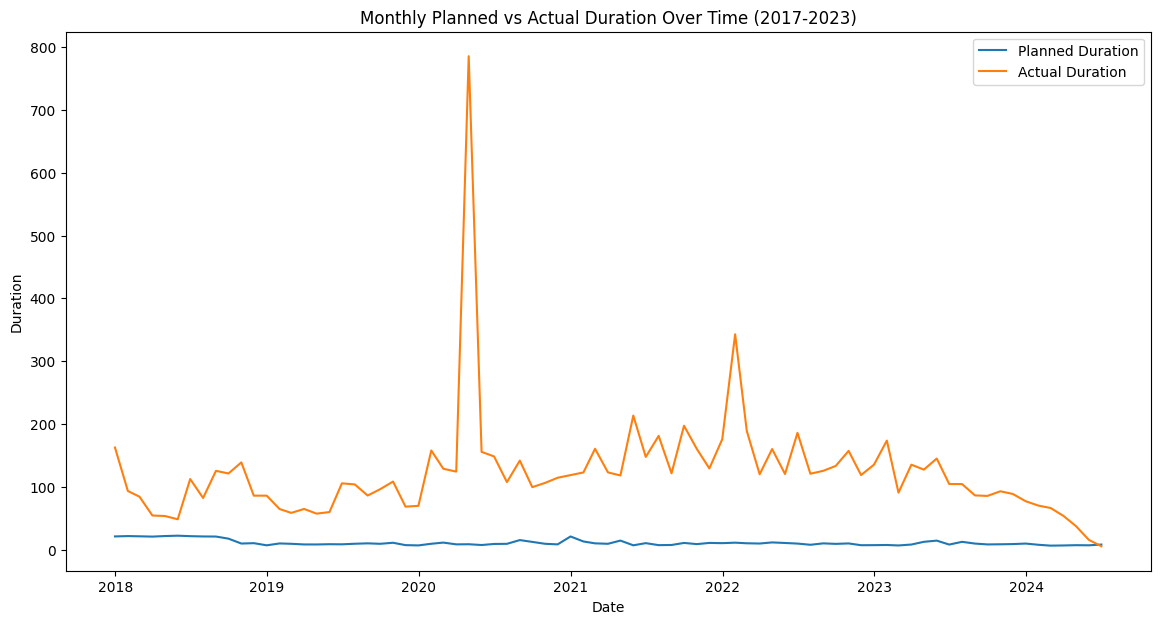

In [ ]:
# Ensure the date column is in datetime format
df['created_on_date_date'] = pd.to_datetime(df['created_on_date_date'])

# If the time column is a string, you can directly convert it using pd.to_timedelta
df['created_on_datetime'] = df['created_on_date_date'] + pd.to_timedelta(df['created_on_date_time'])

print(df['created_on_datetime'].head())  # Check the combined datetime column

# Resample the data by month to aggregate it
df_monthly = df.resample('M', on='created_on_datetime').agg({
    'actual_work': 'sum',  # Sum of actual work for each month
    'plan_duration': 'mean',  # Average planned duration for each month
    'actual_duration': 'mean'  # Average actual duration for each month
}).reset_index()

import matplotlib.pyplot as plt

# Plot actual work over time
plt.figure(figsize=(14, 7))
plt.plot(df_monthly['created_on_datetime'], df_monthly['actual_work'], label='Actual Work')
plt.title('Monthly Actual Work Over Time (2017-2023)')
plt.xlabel('Date')
plt.ylabel('Actual Work')
plt.legend()
plt.show()

# Plot durations over time
plt.figure(figsize=(14, 7))
plt.plot(df_monthly['created_on_datetime'], df_monthly['plan_duration'], label='Planned Duration')
plt.plot(df_monthly['created_on_datetime'], df_monthly['actual_duration'], label='Actual Duration')
plt.title('Monthly Planned vs Actual Duration Over Time (2017-2023)')
plt.xlabel('Date')
plt.ylabel('Duration')
plt.legend()
plt.show()


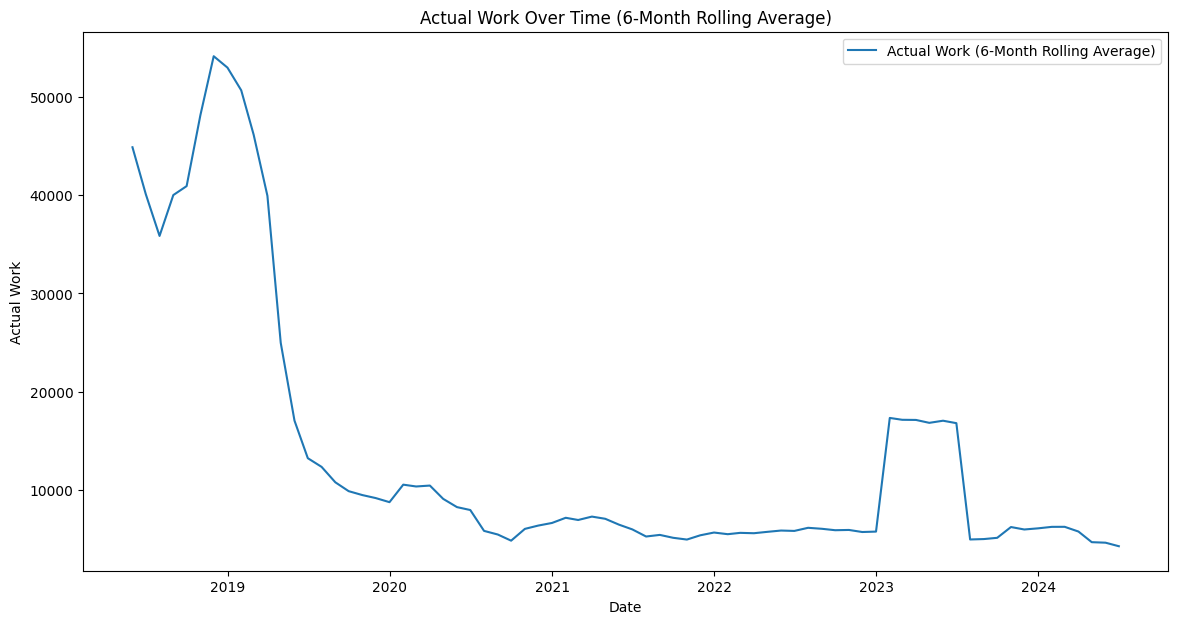

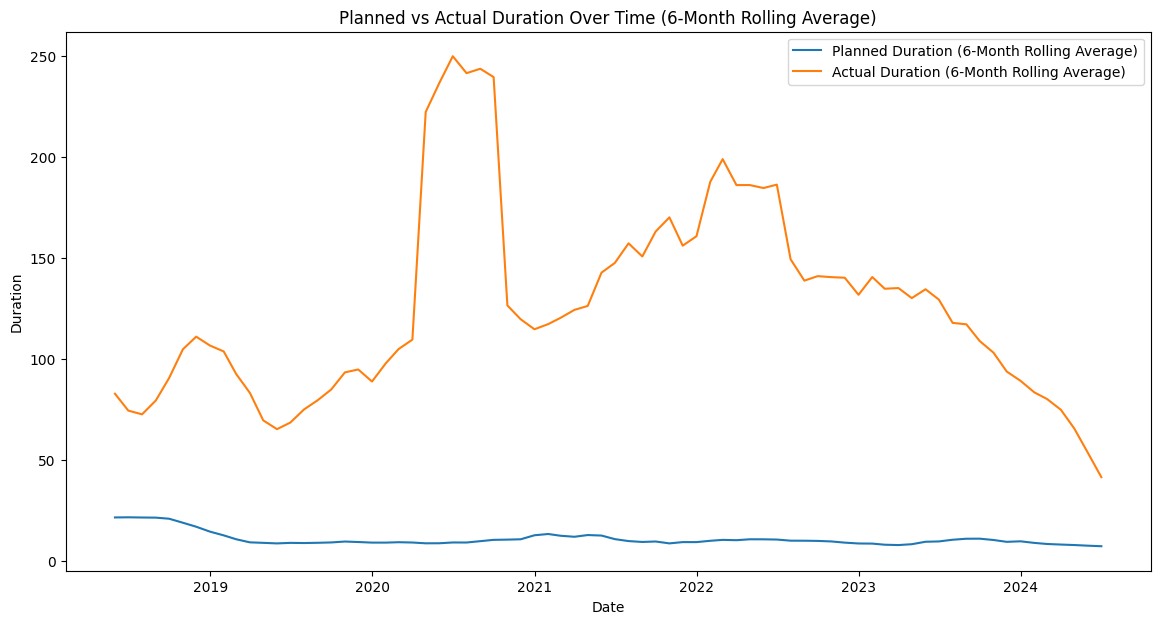

In [ ]:
# Apply a 6-month rolling average to smooth the data
df_monthly['actual_work_roll'] = df_monthly['actual_work'].rolling(window=6).mean()
df_monthly['plan_duration_roll'] = df_monthly['plan_duration'].rolling(window=6).mean()
df_monthly['actual_duration_roll'] = df_monthly['actual_duration'].rolling(window=6).mean()

# Plot rolling average for actual work
plt.figure(figsize=(14, 7))
plt.plot(df_monthly['created_on_datetime'], df_monthly['actual_work_roll'], label='Actual Work (6-Month Rolling Average)')
plt.title('Actual Work Over Time (6-Month Rolling Average)')
plt.xlabel('Date')
plt.ylabel('Actual Work')
plt.legend()
plt.show()

# Plot rolling averages for durations
plt.figure(figsize=(14, 7))
plt.plot(df_monthly['created_on_datetime'], df_monthly['plan_duration_roll'], label='Planned Duration (6-Month Rolling Average)')
plt.plot(df_monthly['created_on_datetime'], df_monthly['actual_duration_roll'], label='Actual Duration (6-Month Rolling Average)')
plt.title('Planned vs Actual Duration Over Time (6-Month Rolling Average)')
plt.xlabel('Date')
plt.ylabel('Duration')
plt.legend()
plt.show()


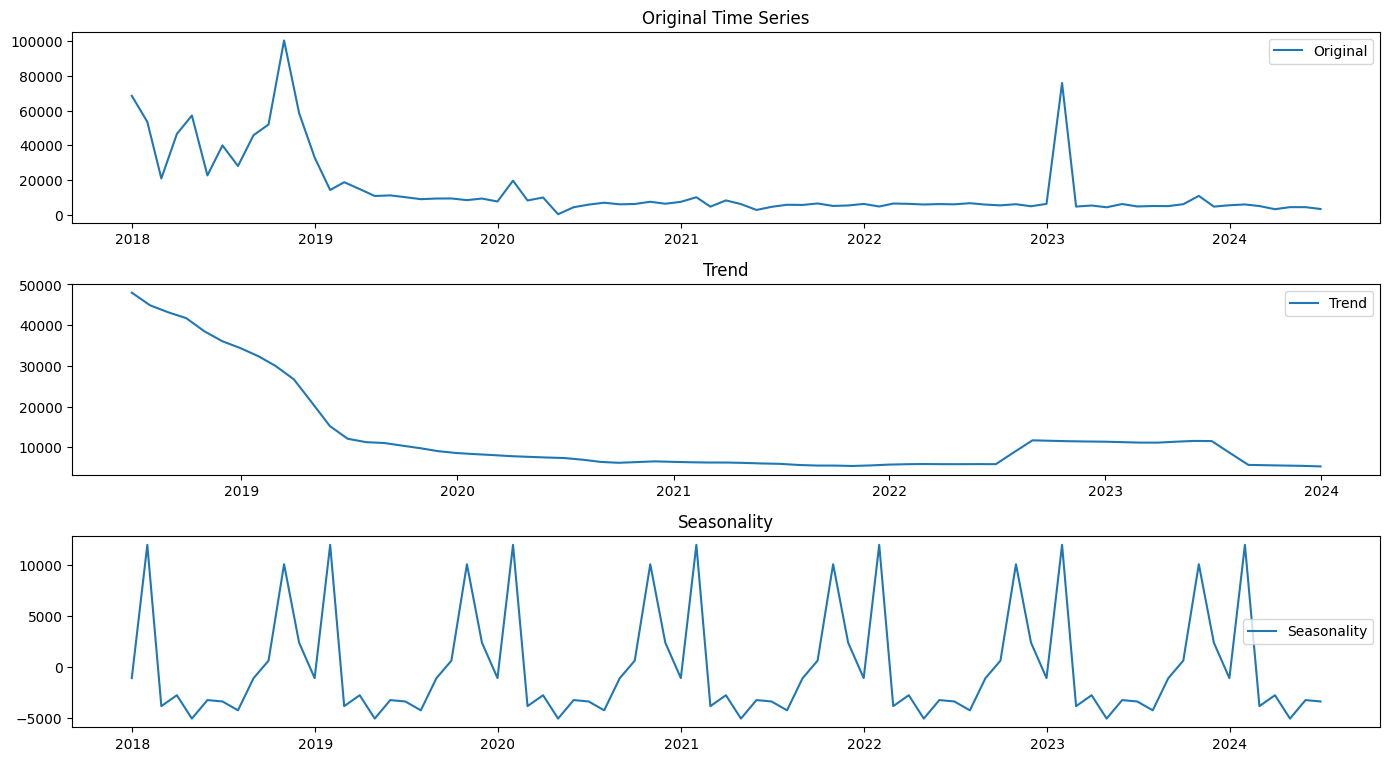

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure the datetime column is set as the index
df['created_on_datetime'] = pd.to_datetime(df['created_on_datetime'])
df.set_index('created_on_datetime', inplace=True)

# Resample the data by month to get monthly sums or means
df_monthly = df.resample('M').agg({
    'actual_work': 'sum',  # Sum of actual work for each month
    'plan_duration': 'mean',  # Average planned duration for each month
    'actual_duration': 'mean'  # Average actual duration for each month
})

# Decompose the actual work time series
decomposition = seasonal_decompose(df_monthly['actual_work'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the decomposed components
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(df_monthly['actual_work'], label='Original')
plt.title('Original Time Series')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.title('Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.title('Seasonality')
plt.legend(loc='best')

# plt.subplot(414)
# plt.plot(residual, label='Residual/Anomaly')
# plt.title('Residual/Anomaly')
# plt.legend(loc='best')

plt.tight_layout()
plt.show()


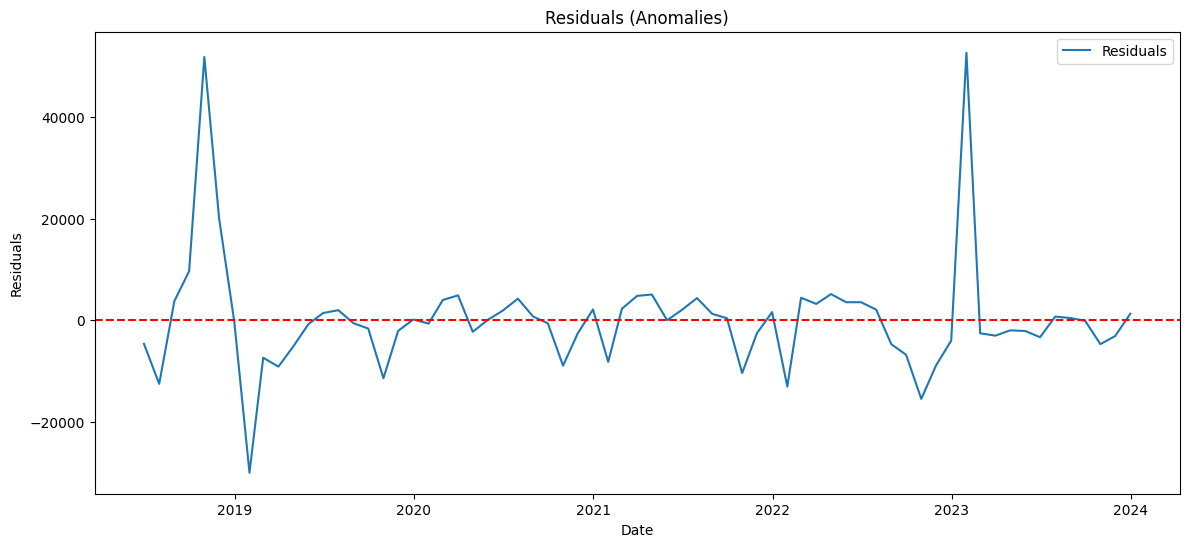

In [ ]:
# Plot the residuals to highlight anomalies
plt.figure(figsize=(14, 6))
plt.plot(residual, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals (Anomalies)')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend(loc='best')
plt.show()


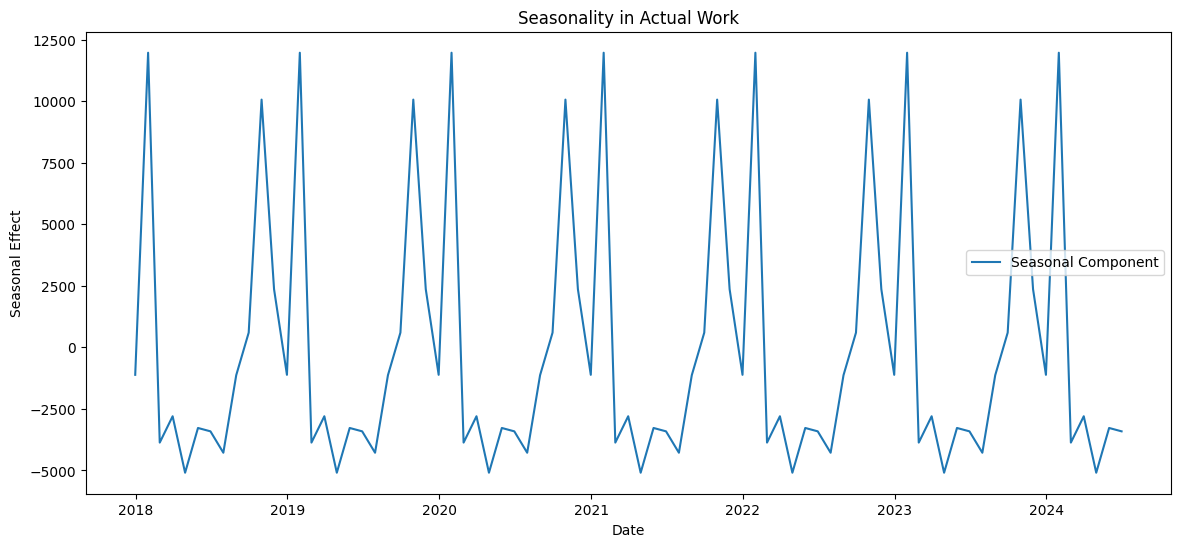

In [ ]:
# Seasonal component visualization
plt.figure(figsize=(14, 6))
plt.plot(seasonal, label='Seasonal Component')
plt.title('Seasonality in Actual Work')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect')
plt.legend(loc='best')
plt.show()


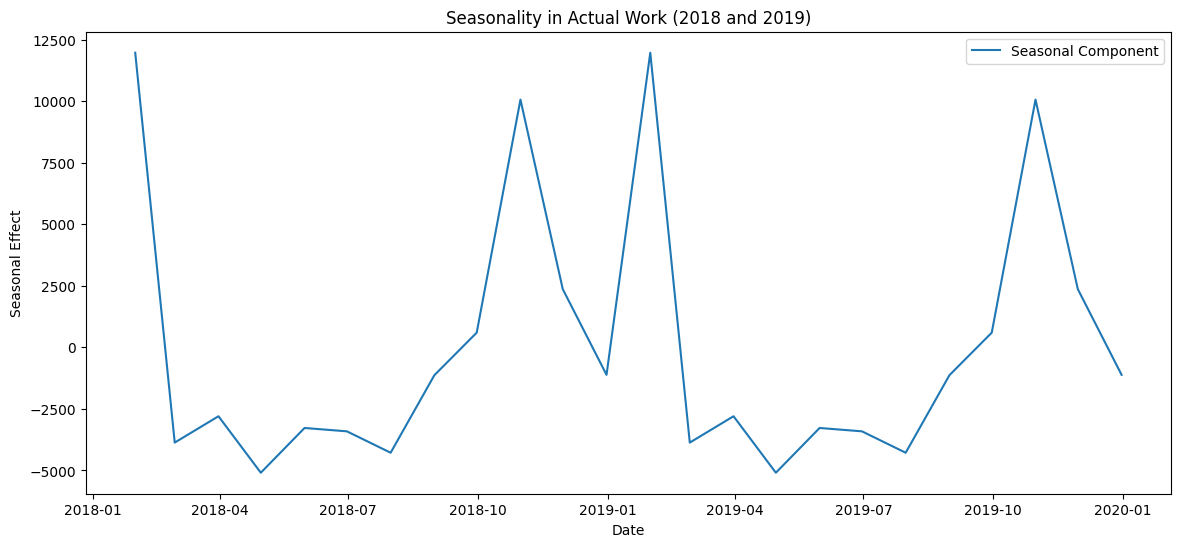

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for 2018 and 2019
seasonality_2018_2019 = seasonal[(seasonal.index.year == 2018) | (seasonal.index.year == 2019)]

# Plotting the seasonality component for 2018 and 2019
plt.figure(figsize=(14, 6))
plt.plot(seasonality_2018_2019, label='Seasonal Component')
plt.title('Seasonality in Actual Work (2018 and 2019)')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect')
plt.legend(loc='best')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

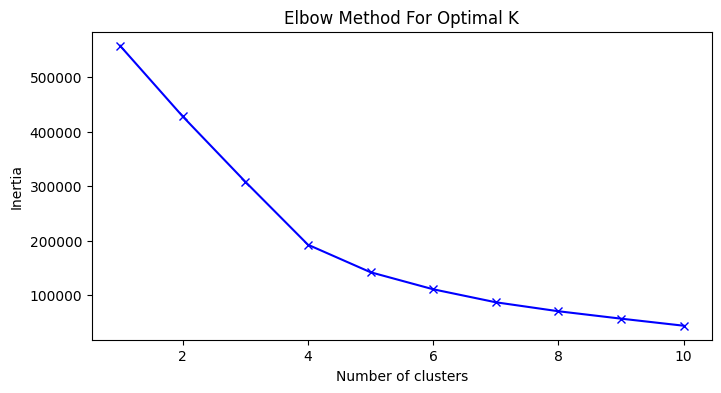

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


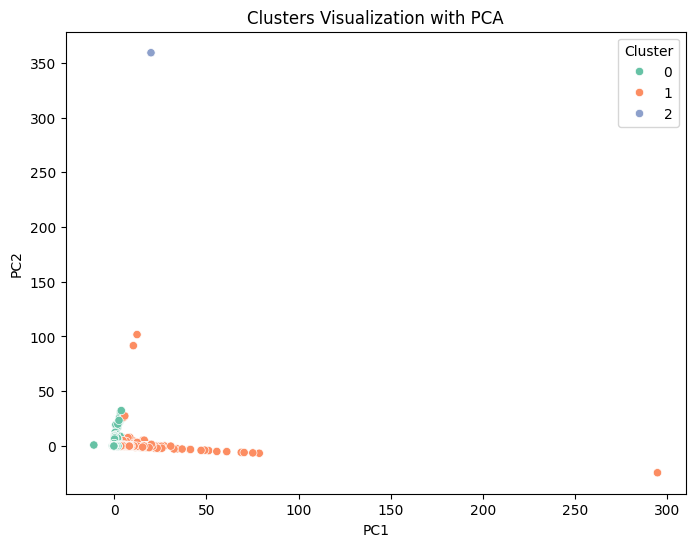

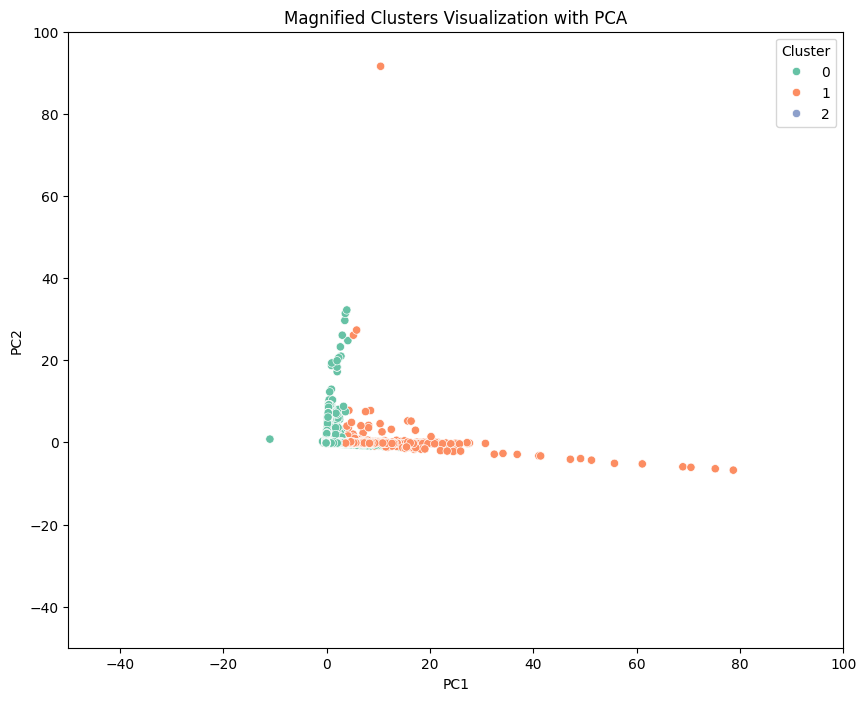

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = df[['plan_duration', 'actual_duration', 'actual_work']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the Elbow Method to find the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

# Assuming we choose an optimal k from the above analysis, say k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

from sklearn.decomposition import PCA
import seaborn as sns

# Reduce the dimensionality to 2D using PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set2')
plt.title('Clusters Visualization with PCA')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the PCA components with a focus on the central area
plt.figure(figsize=(10, 8))

# Adjust axis limits to zoom in on the central region where most data points are
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Cluster'], palette='Set2')

plt.xlim(-50, 100)  # Adjust the x-axis limits as needed
plt.ylim(-50, 100)  # Adjust the y-axis limits as needed

plt.title('Magnified Clusters Visualization with PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()



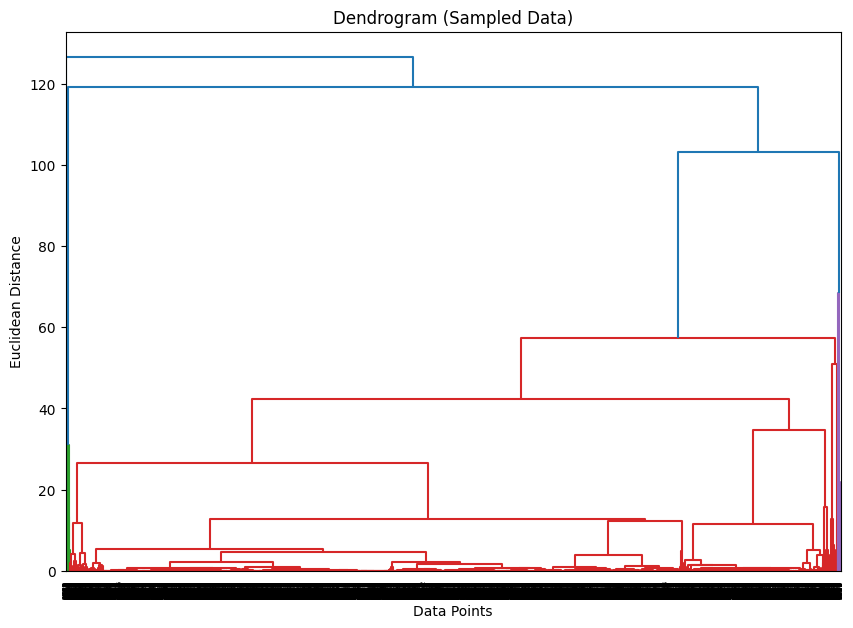

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


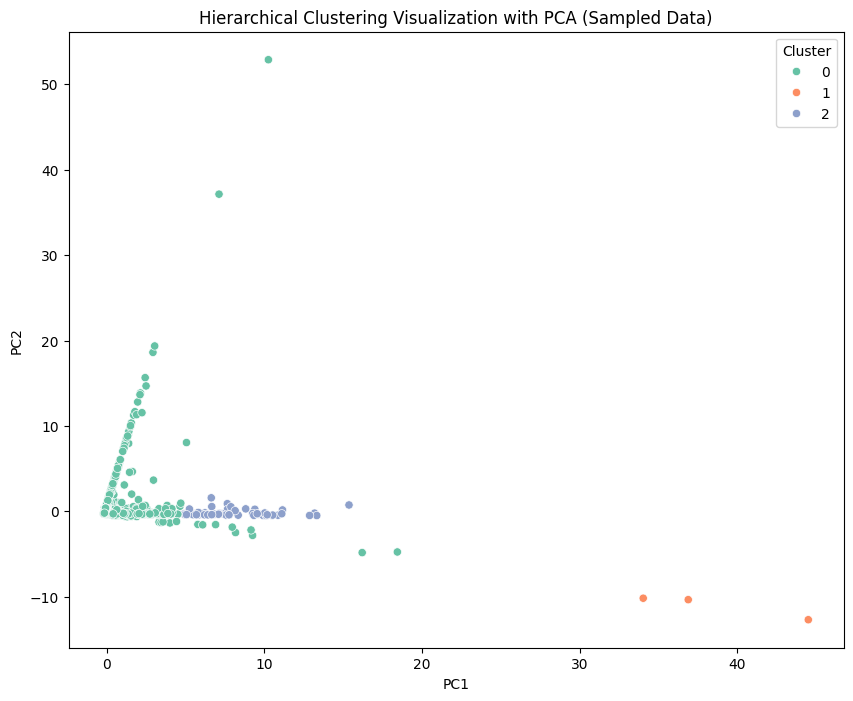

In [ ]:
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
# Select relevant features for clustering
features = df[['plan_duration', 'actual_duration', 'actual_work']]

# Sample a subset of the data (e.g., 10,000 points)
sampled_df = df.sample(n=10000, random_state=42)
sampled_features = sampled_df[['plan_duration', 'actual_duration', 'actual_work']]

# Standardize the features
scaler = StandardScaler()
scaled_sampled_features = scaler.fit_transform(sampled_features)

# Plotting the dendrogram on the sampled data
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_sampled_features, method='ward'))
plt.title('Dendrogram (Sampled Data)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

# Applying Hierarchical Clustering (Agglomerative Clustering) on the sample
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc_sampled_clusters = hc.fit_predict(scaled_sampled_features)

# Visualize the clusters with PCA on the sample
plt.figure(figsize=(10, 8))
pca_sampled = PCA(n_components=2).fit_transform(scaled_sampled_features)
sampled_pca_df = pd.DataFrame(data=pca_sampled, columns=['PC1', 'PC2'])
sampled_pca_df['HC_Cluster'] = hc_sampled_clusters
sns.scatterplot(x=sampled_pca_df['PC1'], y=sampled_pca_df['PC2'], hue=sampled_pca_df['HC_Cluster'], palette='Set2')
plt.title('Hierarchical Clustering Visualization with PCA (Sampled Data)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()


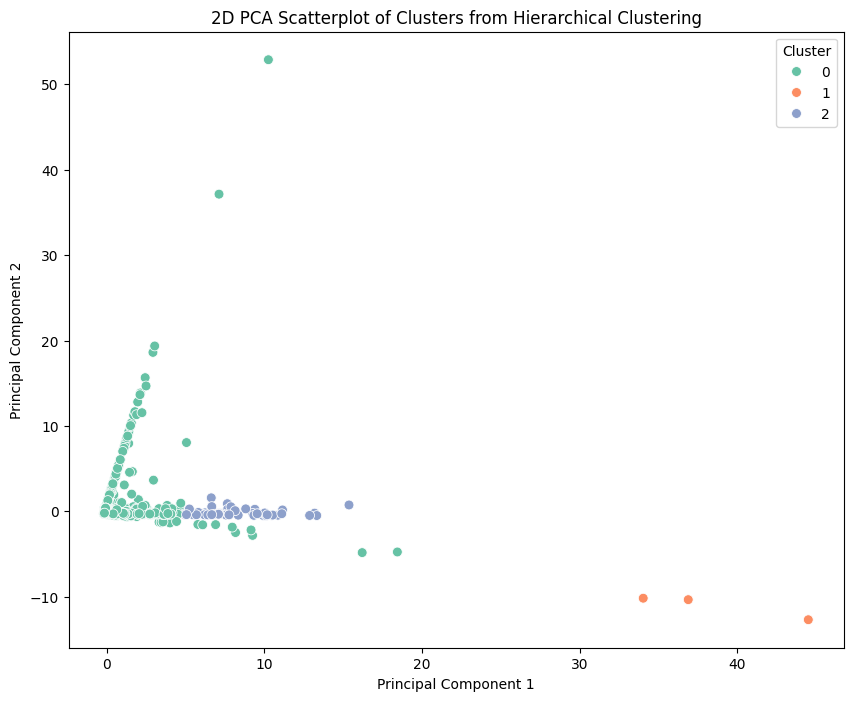

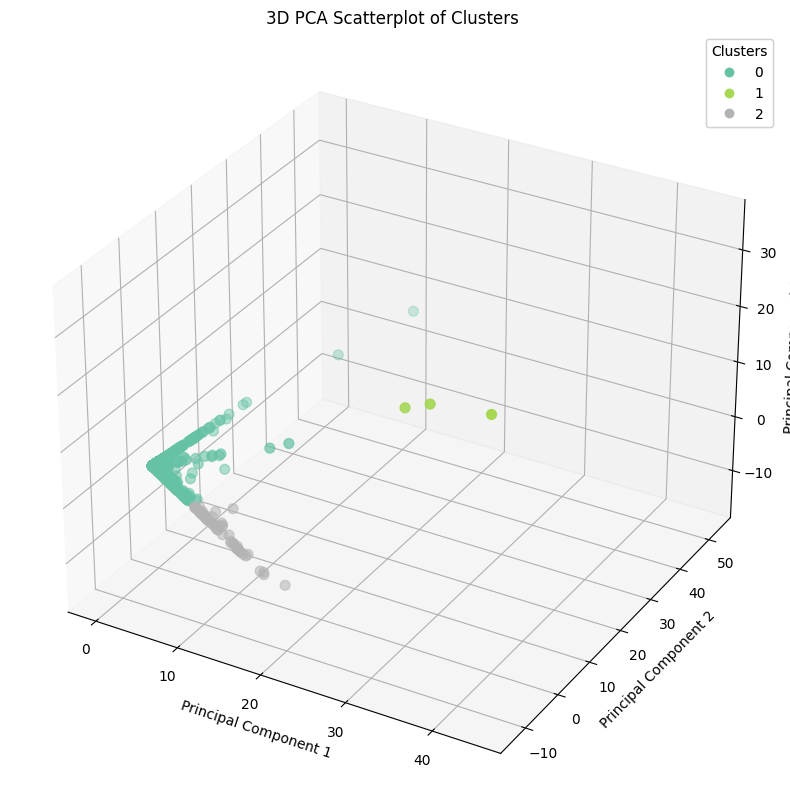

In [ ]:

from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Sample a subset of the data (e.g., 10,000 points)
sampled_df = df.sample(n=10000, random_state=42)
sampled_features = sampled_df[['plan_duration', 'actual_duration', 'actual_work']]

scaler = StandardScaler()
scaled_sampled_features = scaler.fit_transform(sampled_features)

# Perform PCA to reduce the data to 2 dimensions
pca_2d = PCA(n_components=2)
pca_2d_components = pca_2d.fit_transform(scaled_sampled_features)

# Create a DataFrame for the PCA components
pca_2d_df = pd.DataFrame(data=pca_2d_components, columns=['PC1', 'PC2'])
pca_2d_df['Cluster'] = hc_sampled_clusters

# Plot the clusters in 2D space using a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_2d_df, palette='Set2', s=50)
plt.title('2D PCA Scatterplot of Clusters from Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

from mpl_toolkits.mplot3d import Axes3D

# Perform PCA to reduce the data to 3 dimensions
pca_3d = PCA(n_components=3)
pca_3d_components = pca_3d.fit_transform(scaled_sampled_features)

# Create a DataFrame for the PCA components
pca_3d_df = pd.DataFrame(data=pca_3d_components, columns=['PC1', 'PC2', 'PC3'])
pca_3d_df['Cluster'] = hc_sampled_clusters

# Plot the clusters in 3D space using a scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
scatter = ax.scatter(pca_3d_df['PC1'], pca_3d_df['PC2'], pca_3d_df['PC3'],
                     c=pca_3d_df['Cluster'], cmap='Set2', s=50)

# Labeling the axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Scatterplot of Clusters ')

# Adding a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


In [ ]:
import pandas as pd

# Adding cluster labels to the original sampled dataframe
sampled_df['Cluster'] = hc_sampled_clusters

# Calculate the mean values of key features for each cluster
cluster_summary = sampled_df.groupby('Cluster').agg({
    'plan_duration': 'mean',
    'actual_duration': 'mean',
    'actual_work': 'mean',
    'job_type': lambda x: x.value_counts().idxmax(),  # Most common job type
    'Dealer': lambda x: x.value_counts().idxmax()    # Most common Dealer
}).reset_index()

# Display the summary of clusters
print(cluster_summary)


   Cluster  plan_duration  actual_duration  actual_work job_type Dealer
0        0      10.633675        64.517401     4.097214      SCV    D99
1        1       9.333333      3607.300000  5072.733333      CHG    D53
2        2      10.036364      9522.818182     9.676364      WAB    D91
